Data Preprocessing

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("zomato-data.csv")

In [3]:
df['rate'] = df['rate'].str.extract(r'(\d+\.?\d*)')
df['rate'] = df['rate'].astype(float)

In [4]:
le = LabelEncoder()
df['online_order'] = le.fit_transform(df['online_order'])
df['book_table'] = le.fit_transform(df['book_table'])   

In [5]:
#le = LabelEncoder()
#df['listed_in(type)'] = le.fit_transform(df['listed_in(type)'])

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,0,0,3.3,0,100,Dining
144,New Indraprasta,0,0,3.3,0,150,Dining
145,Anna Kuteera,1,0,4.0,771,450,Dining
146,Darbar,0,0,3.0,98,800,Dining
147,Vijayalakshmi,1,0,3.9,47,200,Dining


Data Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='online_order', ylabel='count'>

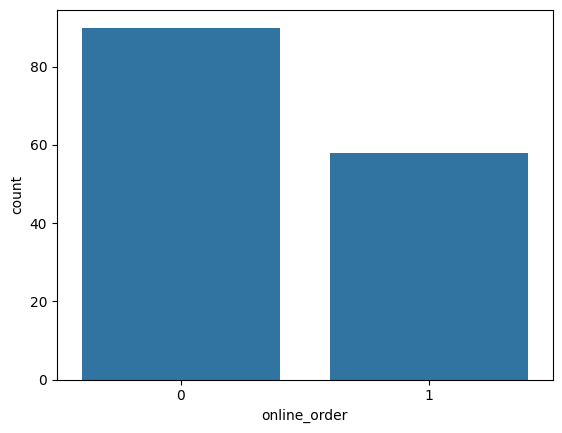

In [9]:
import seaborn as sns
sns.countplot(data=df, x='online_order')

<Axes: xlabel='book_table', ylabel='count'>

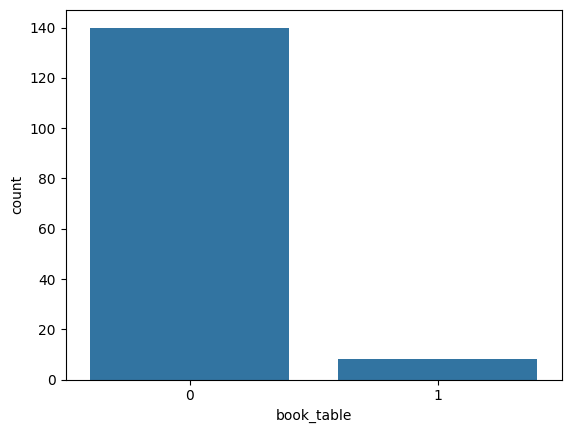

In [10]:
sns.countplot(data=df, x='book_table')

<Axes: xlabel='listed_in(type)', ylabel='count'>

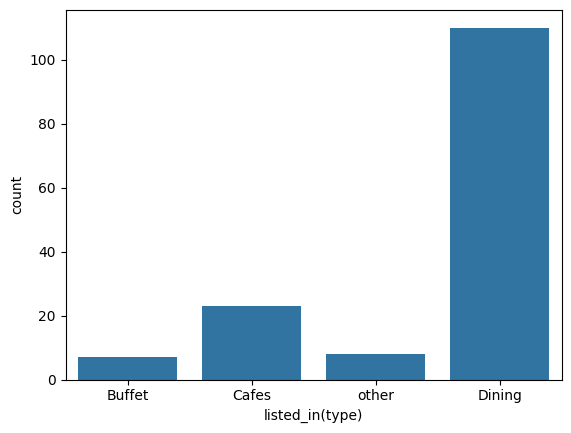

In [11]:
sns.countplot(data=df, x='listed_in(type)')

<Axes: xlabel='rate', ylabel='Count'>

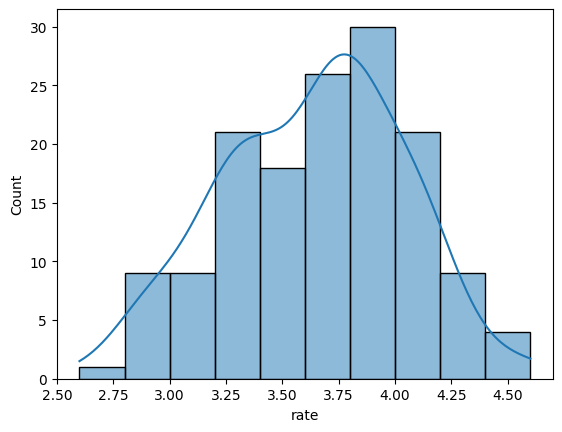

In [12]:
sns.histplot(df['rate'], bins=10, kde=True)

<Axes: xlabel='rate', ylabel='votes'>

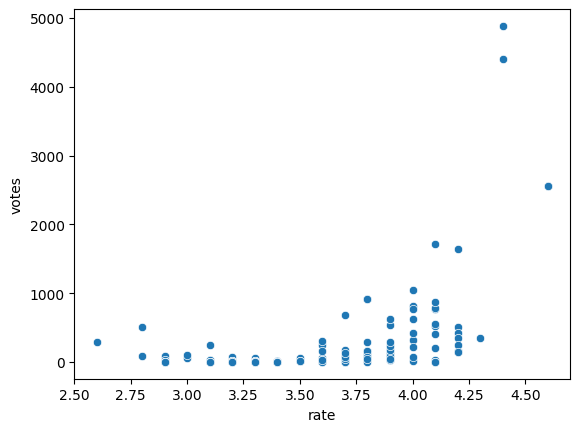

In [13]:
sns.scatterplot(x='rate', y='votes', data=df)

<Axes: xlabel='listed_in(type)', ylabel='approx_cost(for two people)'>

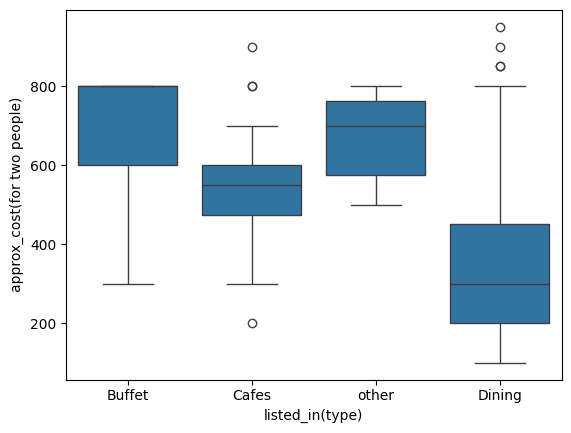

In [14]:
sns.boxplot(x='listed_in(type)', y='approx_cost(for two people)', data=df)

<Axes: xlabel='rate', ylabel='approx_cost(for two people)'>

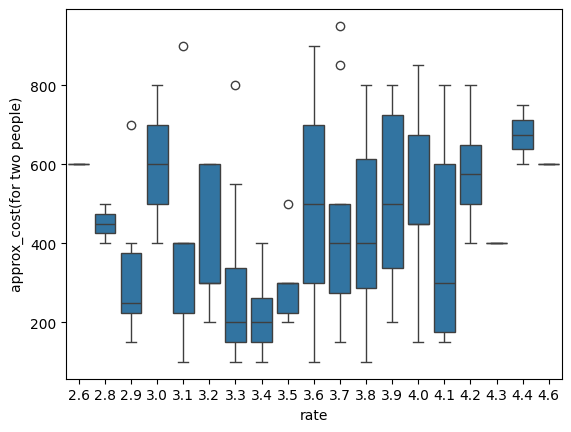

In [15]:
sns.boxplot(x='rate', y='approx_cost(for two people)', data=df)

<Axes: ylabel='name'>

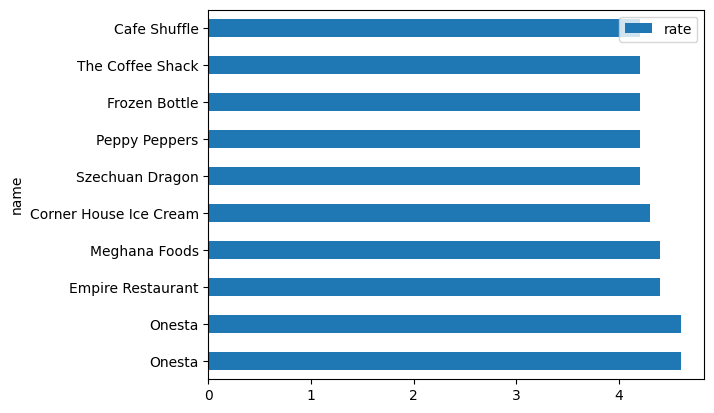

In [16]:
top_rated = df.sort_values(by='rate', ascending=False).head(10)
top_rated.plot(x='name', y='rate', kind='barh')

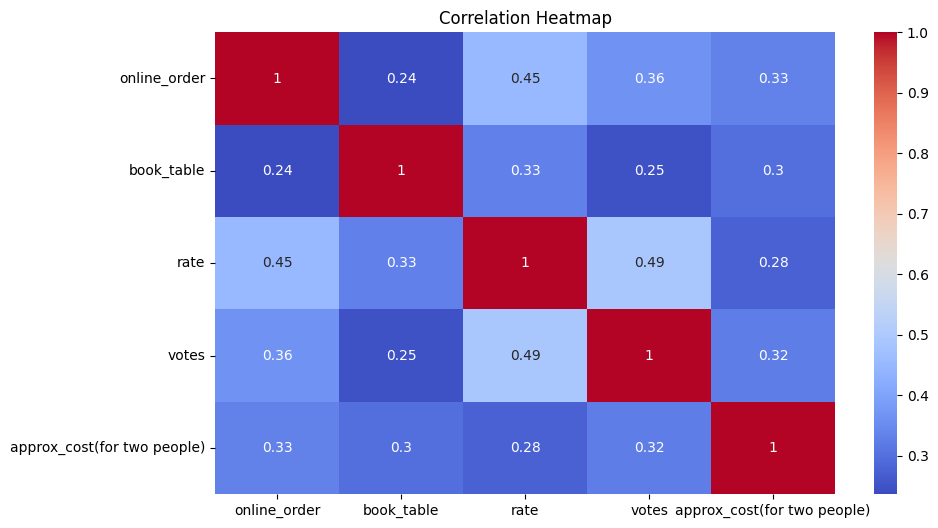

In [17]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

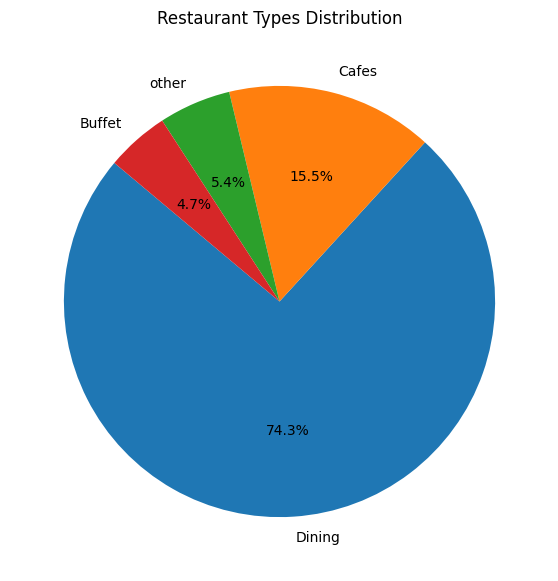

In [18]:
type_counts = df['listed_in(type)'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Restaurant Types Distribution')
plt.show()

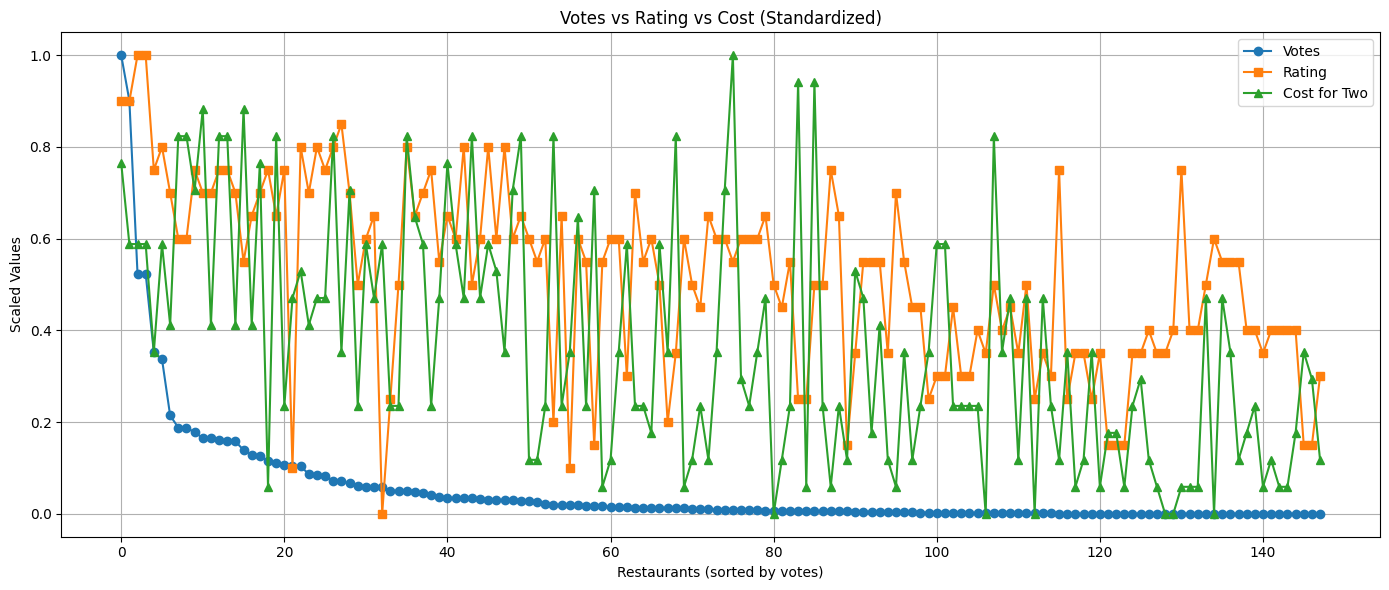

In [19]:
df_sorted = df.sort_values('votes', ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_sorted[['votes', 'rate', 'approx_cost(for two people)']])
scaled_df = pd.DataFrame(scaled_data, columns=['votes', 'rate', 'cost'])

plt.figure(figsize=(14, 6))
plt.plot(scaled_df['votes'], label='Votes', marker='o')
plt.plot(scaled_df['rate'], label='Rating', marker='s')
plt.plot(scaled_df['cost'], label='Cost for Two', marker='^')

plt.title('Votes vs Rating vs Cost (Standardized)')
plt.xlabel('Restaurants (sorted by votes)')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

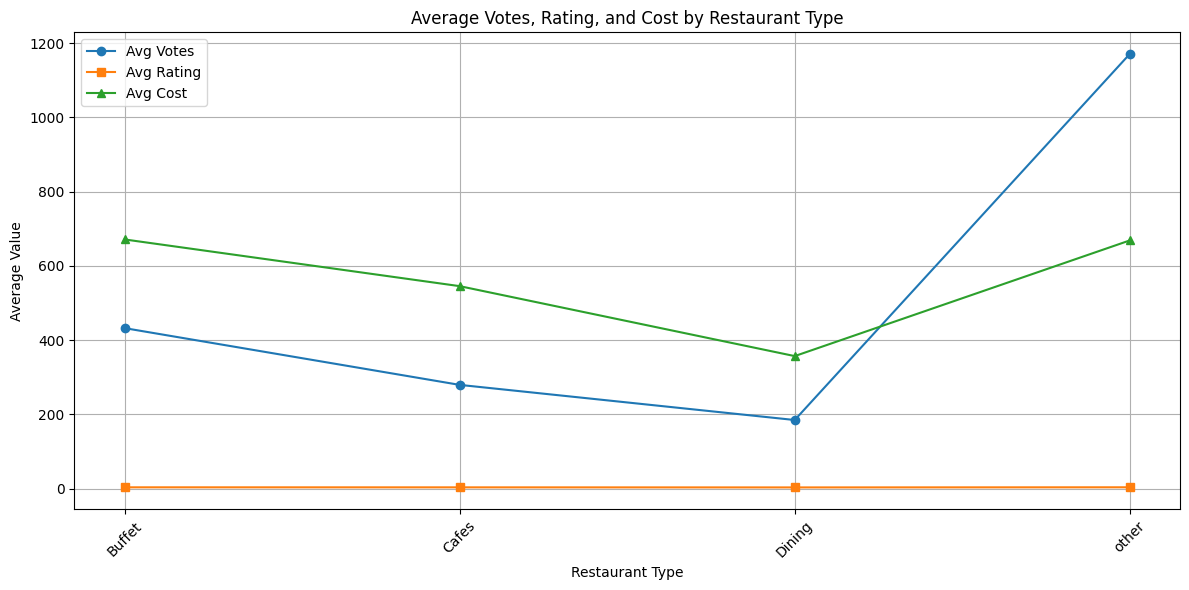

In [20]:
grouped = df.groupby('listed_in(type)')[['votes', 'rate', 'approx_cost(for two people)']].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(grouped['listed_in(type)'], grouped['votes'], label='Avg Votes', marker='o')
plt.plot(grouped['listed_in(type)'], grouped['rate'], label='Avg Rating', marker='s')
plt.plot(grouped['listed_in(type)'], grouped['approx_cost(for two people)'], label='Avg Cost', marker='^')

plt.title('Average Votes, Rating, and Cost by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()